# Demo plots for provided response functions to quantify radio neutrino detectors with `toise`

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from toise import radio_response

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (6, 5)

## Analysis efficiency

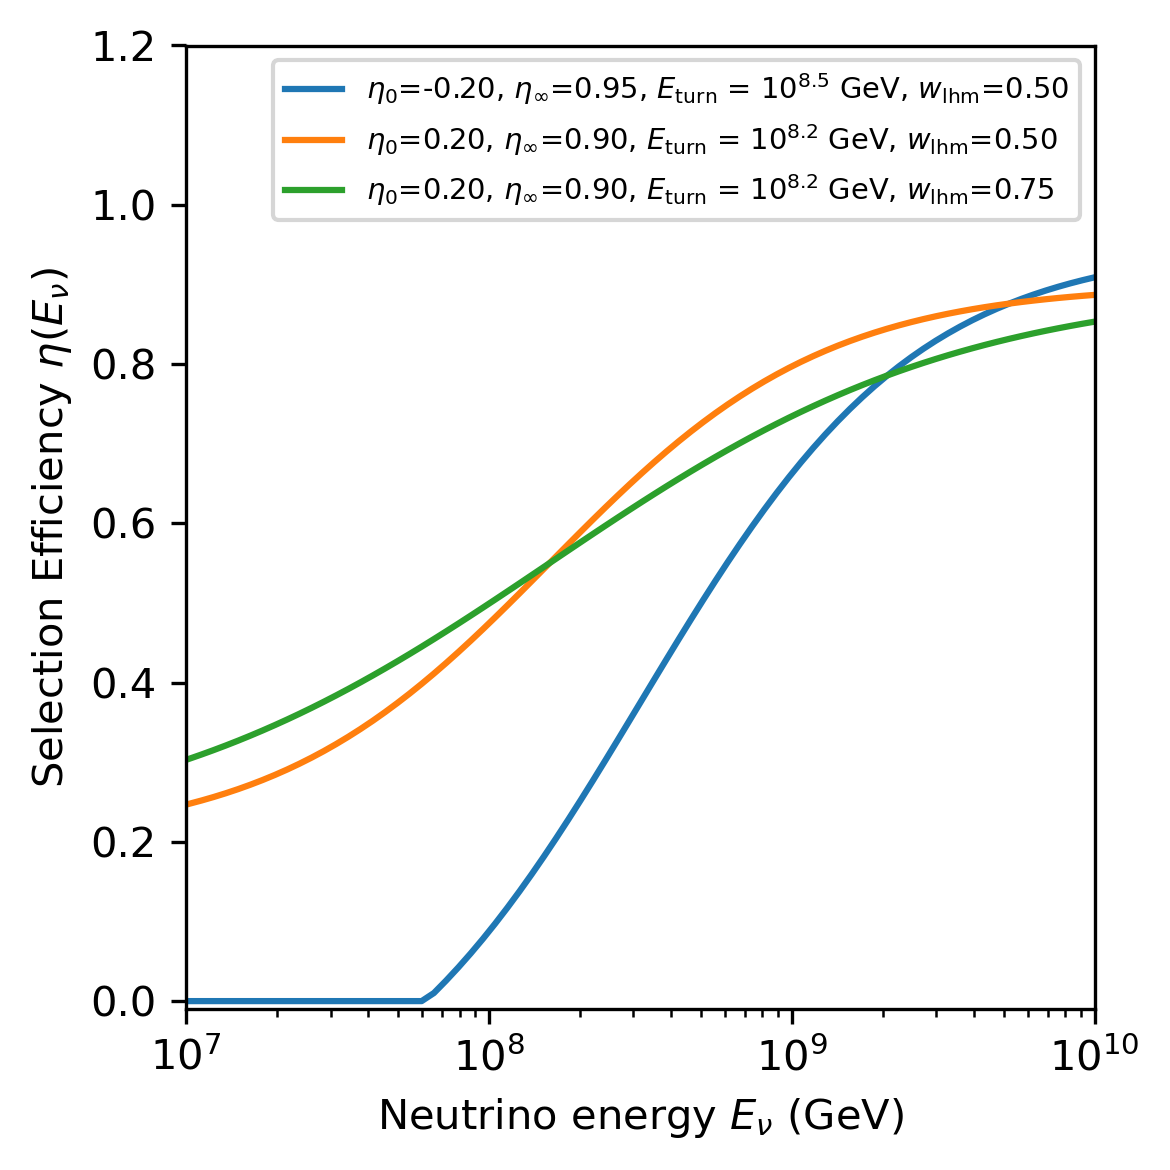

In [8]:
energies = np.logspace(6, 10, 100)

fig = plt.figure(figsize=(4, 4))
ax = fig.subplots()

par_sets = [[-0.2, 0.95, 8.5, 0.5], [0.2, 0.9, 8.2, 0.5], [0.2, 0.9, 8.2, 0.75]]
# par_sets = [[ -0.2, 0.95, 8.5, 0.5],[0.2, 0.9, 8.2, 0.75]]
for eta0, etainf, logeturn, wlhm in par_sets:
    ax.plot(
        energies,
        radio_response.bound_efficiency_sigmoid(energies, eta0, etainf, logeturn, wlhm),
        label=r"$\eta_0$=%.2f, $\eta_\infty$=%.2f, $E_\mathrm{turn}$ = $10^{%.1f}$ GeV, $w_\mathrm{lhm}$=%.2f"
        % (eta0, etainf, logeturn, wlhm),
    )

ax.set_xscale("log")
ax.set_xlabel(r"Neutrino energy $E_\nu$ (GeV)")
ax.set_ylabel(r"Selection Efficiency $\eta(E_\nu)$")
ax.set_xlim([1e7, 1e10])
ax.set_ylim([-0.01, 1.2])
# ax.legend(bbox_to_anchor=(-0.05, 1.3), loc='upper left', fontsize='small')

ax.legend(loc="upper right", fontsize="x-small")

# ax.legend()
# ax.legend(bbox_to_anchor=(1.2, 1.3))
# plt.tight_layout()
# fig.subplots_adjust(left=0.1, top=1.1)
fig.tight_layout()
plt.savefig("radio_analysis_efficiency.pdf", bbox_inches="tight")

## Angular resolution

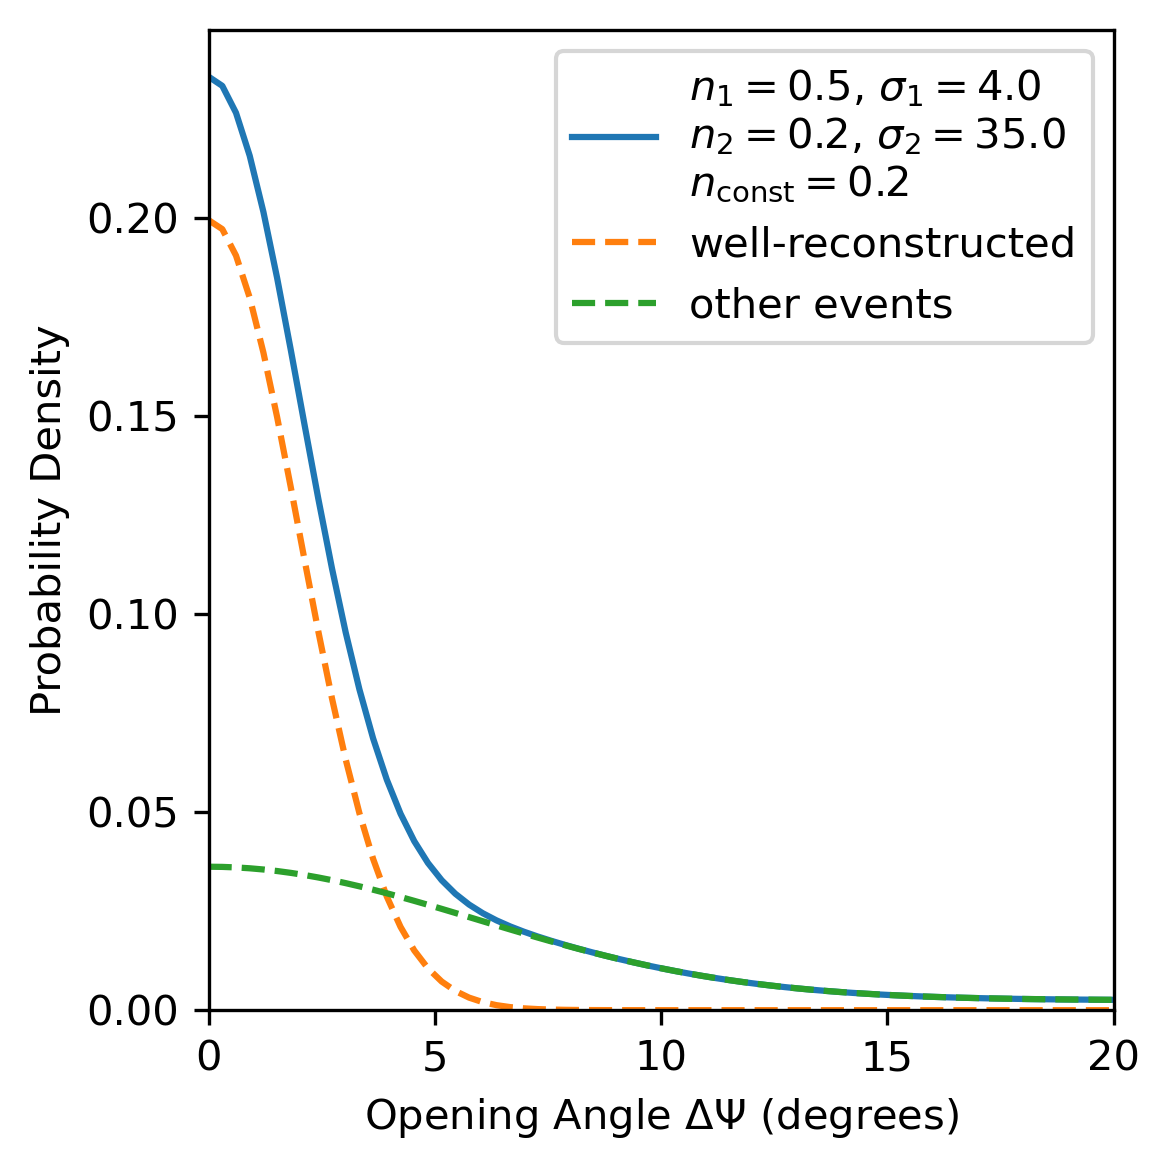

In [9]:
space_angle = np.linspace(0, 30, 100)

fig = plt.figure(figsize=(4, 4))
ax = fig.subplots()

psf = radio_response.RadioPointSpreadFunction(0.5, 4, 0.25, 35, 0.25)
ax.plot(
    space_angle,
    psf.PDF(space_angle),
    label=r"$n_1=%.1f$, $\sigma_1=%.1f$"
    "\n"
    r"$n_2=%.1f$, $\sigma_2=%.1f$"
    "\n"
    "$n_\mathrm{const}=%.1f$" % (0.5, 4, 0.25, 35, 0.25),
)
psf = radio_response.RadioPointSpreadFunction(0.5, 4, 0.0, 35, 0.0)
ax.plot(space_angle, psf.PDF(space_angle), "--", label="well-reconstructed")
psf = radio_response.RadioPointSpreadFunction(0.0, 4, 0.25, 35, 0.25)
ax.plot(space_angle, psf.PDF(space_angle), "--", label="other events")
ax.legend(fontsize="medium")
ax.set_xlabel(r"Opening Angle $\Delta\Psi$ (degrees)")
ax.set_ylabel(r"Probability Density")
ax.set_xlim([0, 20])
ax.set_ylim([0, None])

plt.tight_layout()
plt.savefig("radio_angular_res.pdf", bbox_inches="tight")

## Energy resolution

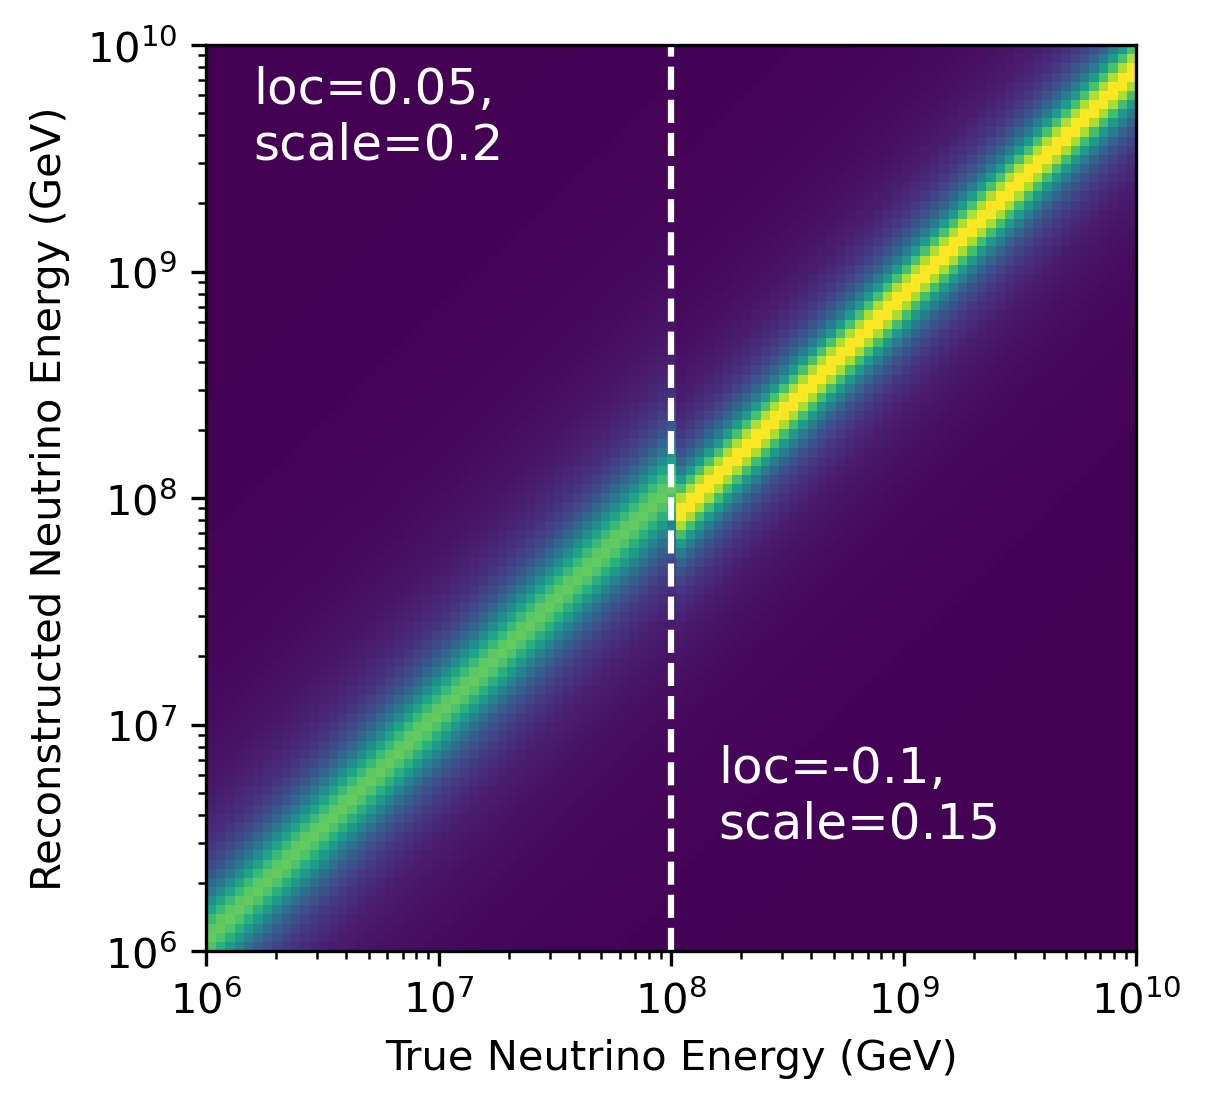

In [10]:
e_response = radio_response.RadioEnergyResolution(loc=-0.1, scale=0.15)
energy = np.logspace(6, 10, 100)
energy2 = np.logspace(6, 10, 100)
r1 = e_response.get_response_matrix(energy, energy2)
# plt.pcolormesh(e_response.get_response_matrix(energy, energy2))
e_response2 = radio_response.RadioEnergyResolution(loc=0.05, scale=0.2)
r2 = e_response2.get_response_matrix(energy, energy2)

r1[:, :50] = r2[:, :50]

fig = plt.figure(figsize=(4, 4))
ax = fig.subplots()
ax.pcolormesh(energy, energy, r1)
ax.loglog()
ax.axvline(1e8, color="white", linestyle="--")
# ax.set_xlabel(r"$E_\mathrm{unsmeared}$ [GeV]")
# ax.set_ylabel(r"$E_\mathrm{smeared}$ [GeV]")
ax.set_ylabel("Reconstructed Neutrino Energy (GeV)")
ax.set_xlabel("True Neutrino Energy (GeV)")
ax.text(10**6.2, 10**9.5, "loc=0.05,\nscale=0.2", fontsize=12, color="white")
ax.text(10**8.2, 10**6.5, "loc=-0.1,\nscale=0.15", fontsize=12, color="white")
plt.savefig("radio_energy_res.pdf", bbox_inches="tight")

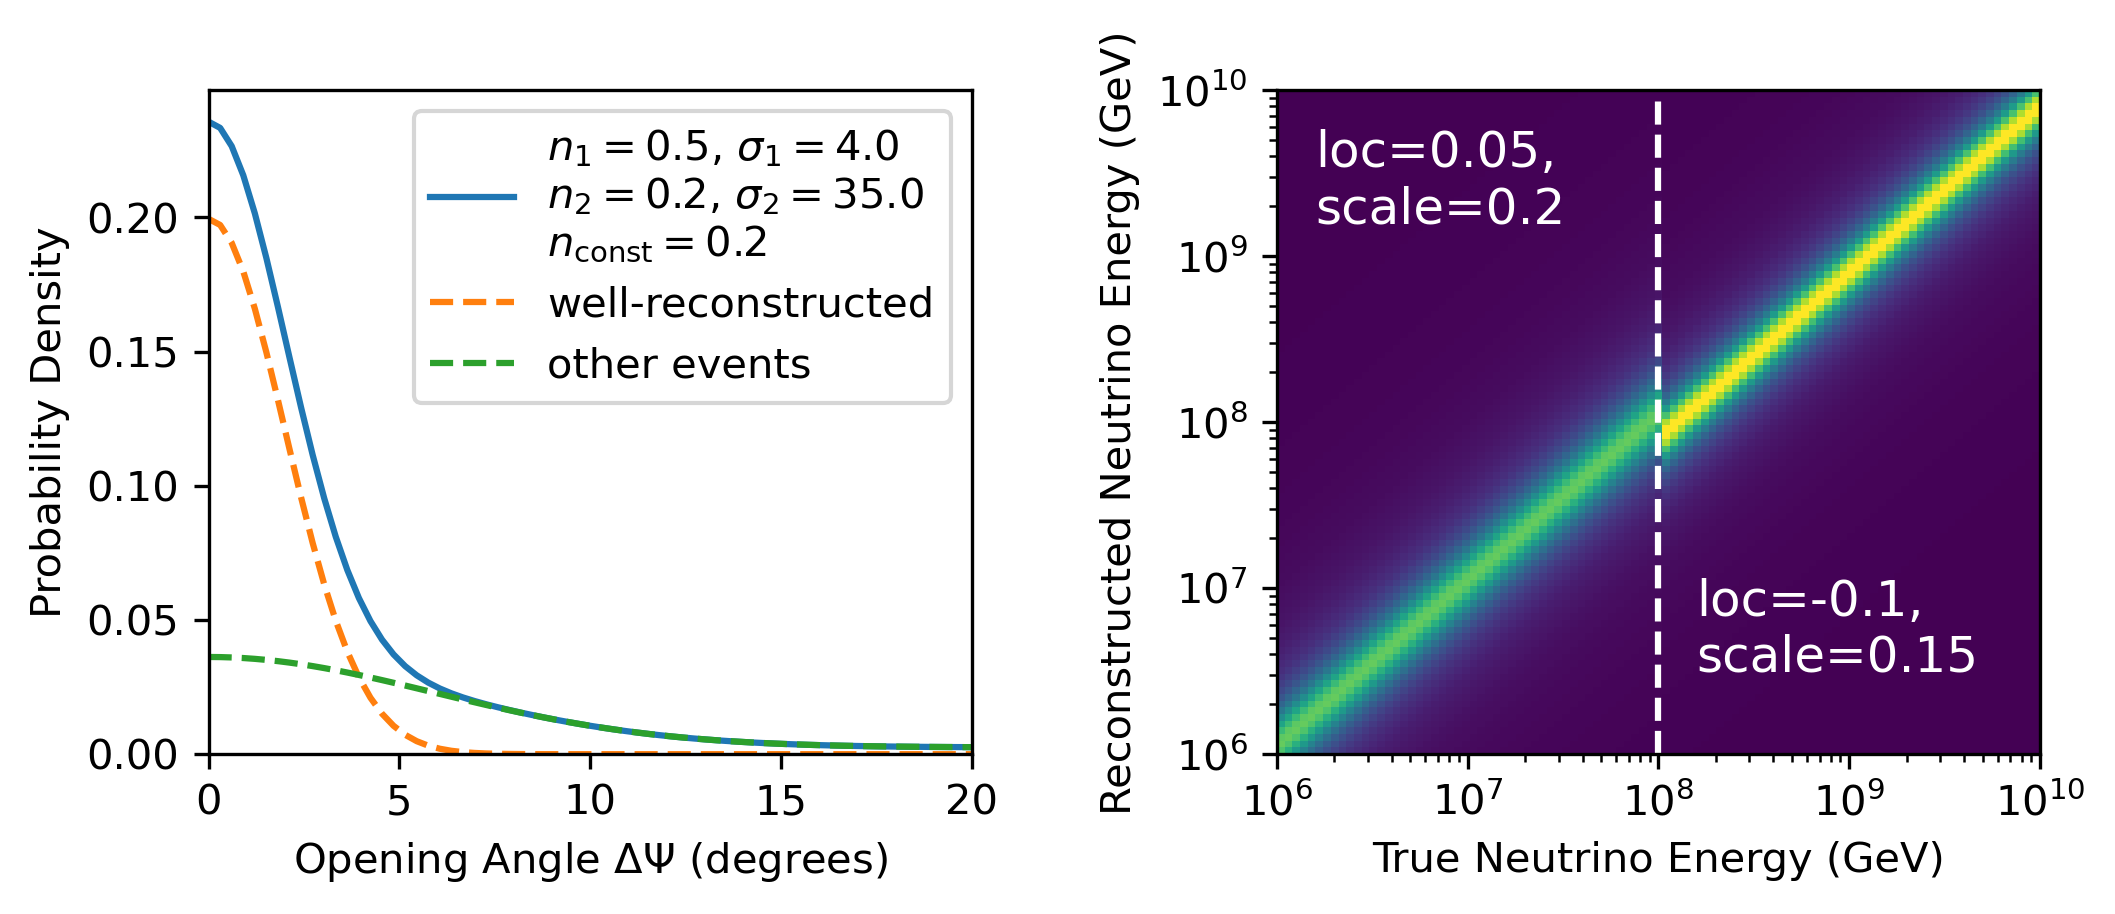

In [11]:
fig = plt.figure(figsize=(7, 3))
import matplotlib.gridspec as gridspec

gs0 = gridspec.GridSpec(1, 2, figure=fig)
axes = [fig.add_subplot(gs0[0]), fig.add_subplot(gs0[1])]

psf = radio_response.RadioPointSpreadFunction(0.5, 4, 0.25, 35, 0.25)
axes[0].plot(
    space_angle,
    psf.PDF(space_angle),
    label=r"$n_1=%.1f$, $\sigma_1=%.1f$"
    "\n"
    r"$n_2=%.1f$, $\sigma_2=%.1f$"
    "\n"
    "$n_\mathrm{const}=%.1f$" % (0.5, 4, 0.25, 35, 0.25),
)
psf = radio_response.RadioPointSpreadFunction(0.5, 4, 0.0, 35, 0.0)
axes[0].plot(space_angle, psf.PDF(space_angle), "--", label="well-reconstructed")
psf = radio_response.RadioPointSpreadFunction(0.0, 4, 0.25, 35, 0.25)
axes[0].plot(space_angle, psf.PDF(space_angle), "--", label="other events")
axes[0].legend(fontsize="medium")
axes[0].set_xlabel(r"Opening Angle $\Delta\Psi$ (degrees)")
axes[0].set_ylabel(r"Probability Density")
axes[0].set_xlim([0, 20])
axes[0].set_ylim([0, None])

e_response = radio_response.RadioEnergyResolution(loc=-0.1, scale=0.15)
energy = np.logspace(6, 10, 100)
energy2 = np.logspace(6, 10, 100)
r1 = e_response.get_response_matrix(energy, energy2)
# plt.pcolormesh(e_response.get_response_matrix(energy, energy2))
e_response2 = radio_response.RadioEnergyResolution(loc=0.05, scale=0.2)
r2 = e_response2.get_response_matrix(energy, energy2)
r1[:, :50] = r2[:, :50]
axes[1].pcolormesh(energy, energy, r1)
axes[1].loglog()
axes[1].axvline(1e8, color="white", linestyle="--")
axes[1].set_ylabel("Reconstructed Neutrino Energy (GeV)")
axes[1].set_xlabel("True Neutrino Energy (GeV)")
axes[1].text(10**6.2, 10**9.2, "loc=0.05,\nscale=0.2", fontsize=12, color="white")
axes[1].text(10**8.2, 10**6.5, "loc=-0.1,\nscale=0.15", fontsize=12, color="white")


plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.savefig("radio_angular_and_e_res.pdf", bbox_inches="tight")